In [81]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def poisson(lam):
    p = np.exp(-lam)
    f = p
    for j in range(1, int(lam) + 1):
        p *= lam / j
        f += p
    u = rnd.random()
    if u >= f:
        j = int(lam) + 1
        while u >= f:
            p *= lam/ j
            f += p
            j += 1
        return j - 1
    else:
        j = int(lam)
        while u < f:
            f -= p
            p *= j / lam
            j -= 1
        return j + 1

In [83]:
def var_exp(l):
    return - np.log(1 - rnd.random()) / l

def proc_poisson(t, l):
    c_t = 0
    nt = 0
    eventos = []
    while c_t < t:
        c_t += var_exp(l)
        if c_t <= t:
            nt += 1
            eventos.append(c_t)
    return nt, eventos

In [84]:
def poisson_rec(lam, i, p_i):
    return p_i * lam / i if i > 0 else np.exp(-lam)

def poisson_prob(lam, i):
    last = 0
    acc = []
    for k in range(i+1):
        last = poisson_rec(lam, k, last)
        acc.append(last)
    return acc

def proc_poisson_imp(tt, lam):
    poi = poisson(lam*tt)
    n = poisson_prob(lam*tt)
    return None

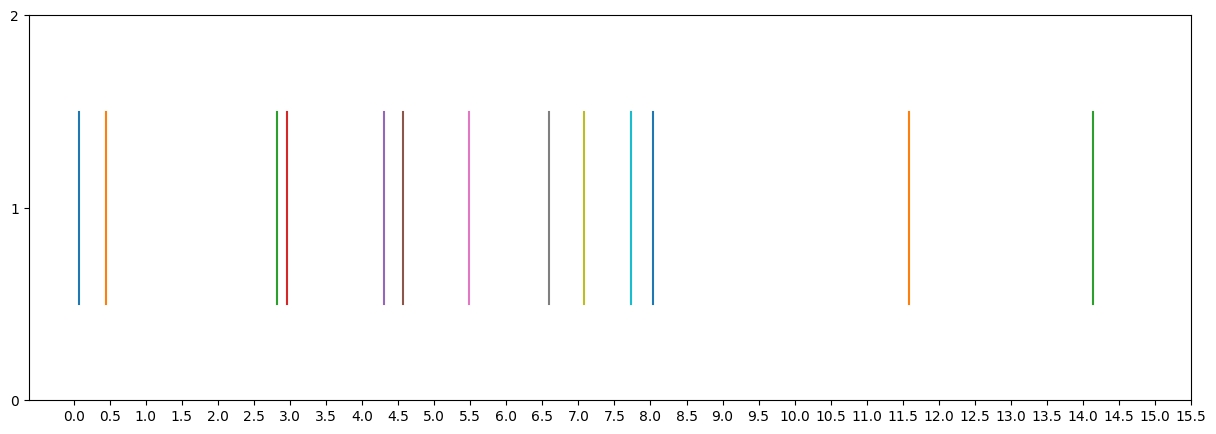

In [85]:
T = 15

t, evs = proc_poisson(T,1)

for ev in evs:
    plt.plot([ev,ev],[1.5,0.5])

plt.yticks(np.arange(0,3,1))
plt.xticks(np.arange(0,T+1,0.5))
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.show()